In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import scipy as sp
from joblib import dump, load #we can also pickle
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,41,60.5,1
1,33,47.0,0
2,42,47.0,0
3,44,33.9,0
4,29,37.9,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             199 non-null    int64  
 1   physical_score  199 non-null    float64
 2   test_result     199 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB


In [7]:
df.describe()

,age,physical_score,test_result
count,199.000000,199.000000,199.000000
mean,39.668342,58.698995,0.673367
std,8.592371,14.910118,0.470165
min,25.000000,33.000000,0.000000
25%,32.000000,46.750000,0.000000
50%,39.000000,57.900000,1.000000
75%,47.000000,71.350000,1.000000
max,55.000000,87.800000,1.000000


In [8]:
df['test_result'].value_counts()

1    134
0     65
Name: test_result, dtype: int64

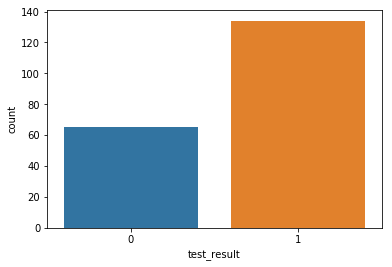

In [9]:
sns.countplot(data=df,x='test_result')

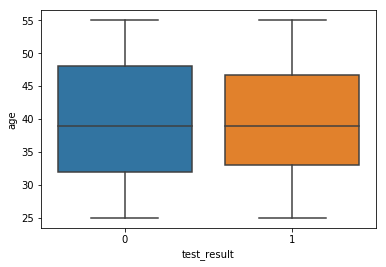

In [10]:
sns.boxplot(data=df,x='test_result',y='age')

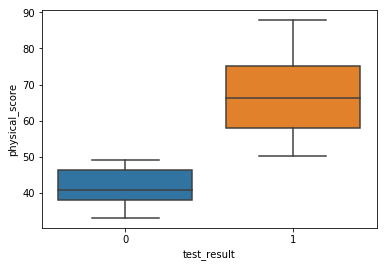

In [11]:
sns.boxplot(x='test_result',y='physical_score',data=df)

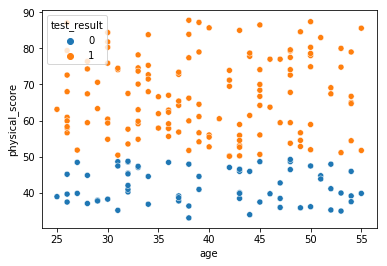

In [12]:
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result')

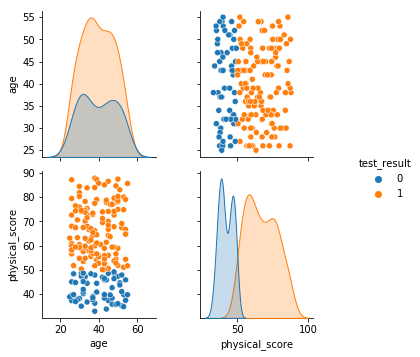

In [14]:
sns.pairplot(df,hue='test_result')

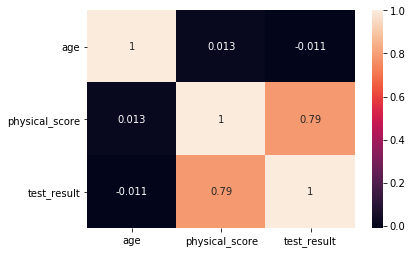

In [15]:
sns.heatmap(df.corr(),annot=True)

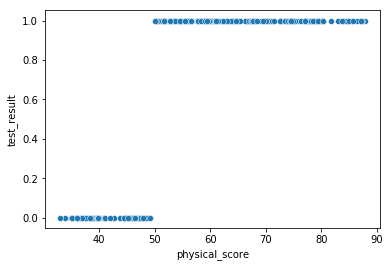

In [16]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

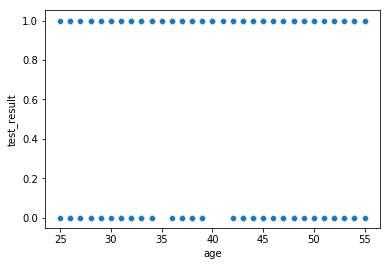

In [17]:
sns.scatterplot(x='age',y='test_result',data=df)

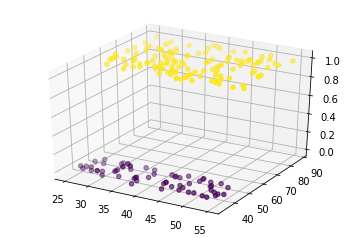

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

## Train test and split and Scaling


In [20]:
df.head()

,age,physical_score,test_result
0,41,60.5,1
1,33,47.0,0
2,42,47.0,0
3,44,33.9,0
4,29,37.9,0


In [23]:
X=df.drop('test_result',axis=1)
X.head()

,age,physical_score
0,41,60.5
1,33,47.0
2,42,47.0
3,44,33.9
4,29,37.9


In [24]:
y=df['test_result']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: test_result, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [26]:
y_test.shape

(40,)

In [28]:
X_test.shape

(40, 2)

In [29]:
scaler= StandardScaler()

In [30]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [31]:
scaled_X_train

array([[-1.13426914,  0.08299675],
       [ 1.69473154,  0.45241618],
       [ 0.2802312 ,  0.780789  ],
       [-0.89851908, -0.86791623],
       [-1.13426914,  1.21861944],
       [ 1.45898148, -1.16208355],
       [ 0.2802312 ,  1.08179743],
       [-0.42701897, -0.66268321],
       [ 1.22323143,  2.005346  ],
       [ 0.98748137,  1.47174016],
       [-0.89851908, -0.88159843],
       [-0.89851908, -0.31378708],
       [ 0.63385628,  1.09547963],
       [-0.07339389, -1.17576575],
       [ 0.39810623, -0.5395434 ],
       [ 0.63385628, -1.41520427],
       [-1.60576925,  0.12404335],
       [ 0.86960634, -1.34679327],
       [-0.42701897,  0.28822976],
       [ 0.63385628, -0.64900101],
       [-1.60576925,  0.01458574],
       [ 0.98748137, -0.60795441],
       [-1.01639411, -0.5258612 ],
       [-1.60576925, -1.41520427],
       [-1.13426914, -0.22485278],
       [ 0.75173131,  1.29387154],
       [ 0.75173131, -1.25785896],
       [-1.01639411, -1.57254958],
       [-1.60576925,

## Logistic Regression Model


In [32]:
log_model= LogisticRegression()

In [33]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [34]:
log_model.coef_

array([[0.03178949, 4.3230094 ]])

This means:
* We can expect the **odds** of passing the test to **small increase** (the original coeff was positive) per unit increase of the age.
* We can expect the **odds** of passing the test to **big increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

## Model Performance on Classification Task 

In [35]:
y_pred=log_model.predict(scaled_X_test)

In [36]:
accuracy_score(y_test,y_pred)

1.0

In [37]:
confusion_matrix(y_test,y_pred)

array([[11,  0],
       [ 0, 29]], dtype=int64)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


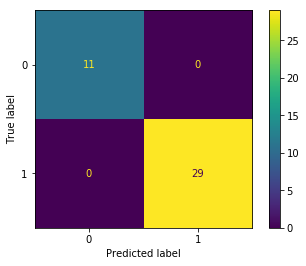

In [39]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


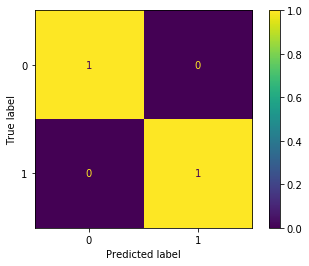

In [42]:
#Scaled so higest value = 1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [44]:
X_train.iloc[6]

age               42.0
physical_score    73.9
Name: 62, dtype: float64

In [45]:
y_train.iloc[6]

1

In [48]:
log_model.predict_proba(X_train.iloc[6].values.reshape(1,-1))

array([[0., 1.]])

In [49]:
log_model.predict(X_train.iloc[6].values.reshape(1,-1))

array([1], dtype=int64)

## Evaluating Curves and AUC 

In [51]:
precision_recall_curve()

TypeError: precision_recall_curve() missing 2 required positional arguments: 'y_true' and 'probas_pred'

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


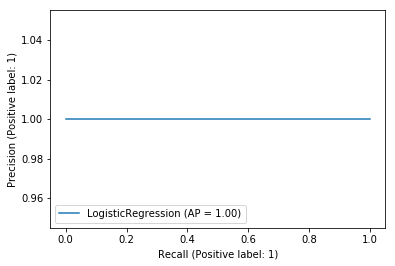

In [53]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


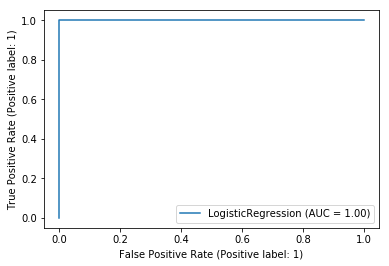

In [54]:
plot_roc_curve(log_model,scaled_X_test,y_test)